In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [3]:
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [5]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


##  1. Highest and Lowest Selling Prices

In [7]:
df['sellingprice'].max()

230000.0

In [8]:
df['sellingprice'].min()

1.0

## 2. Average Selling Price

In [9]:
df['sellingprice'].mean()

13611.358810003132

## 3. How many Red Cars are there

In [10]:
len(df[df['color'] == 'red'])

43569

## 4. How many Cars are registered in "ca" State

In [11]:
len(df[df['state'] == 'ca'])

73148

## 5. Do certain body types (e.g., sedan, SUV, truck) tend to sell better than others ? 

In [12]:
body_type_prices = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
print(body_type_prices)

body
granturismo convertible    79041.666667
GranTurismo Convertible    74000.000000
CTS-V Wagon                50500.000000
cts-v coupe                39707.142857
CTS-V Coupe                38425.750000
                               ...     
Xtracab                     5818.750000
xtracab                     5250.000000
Club Cab                    4650.064103
Cab Plus                    2825.000000
Ram Van                     1200.000000
Name: sellingprice, Length: 87, dtype: float64


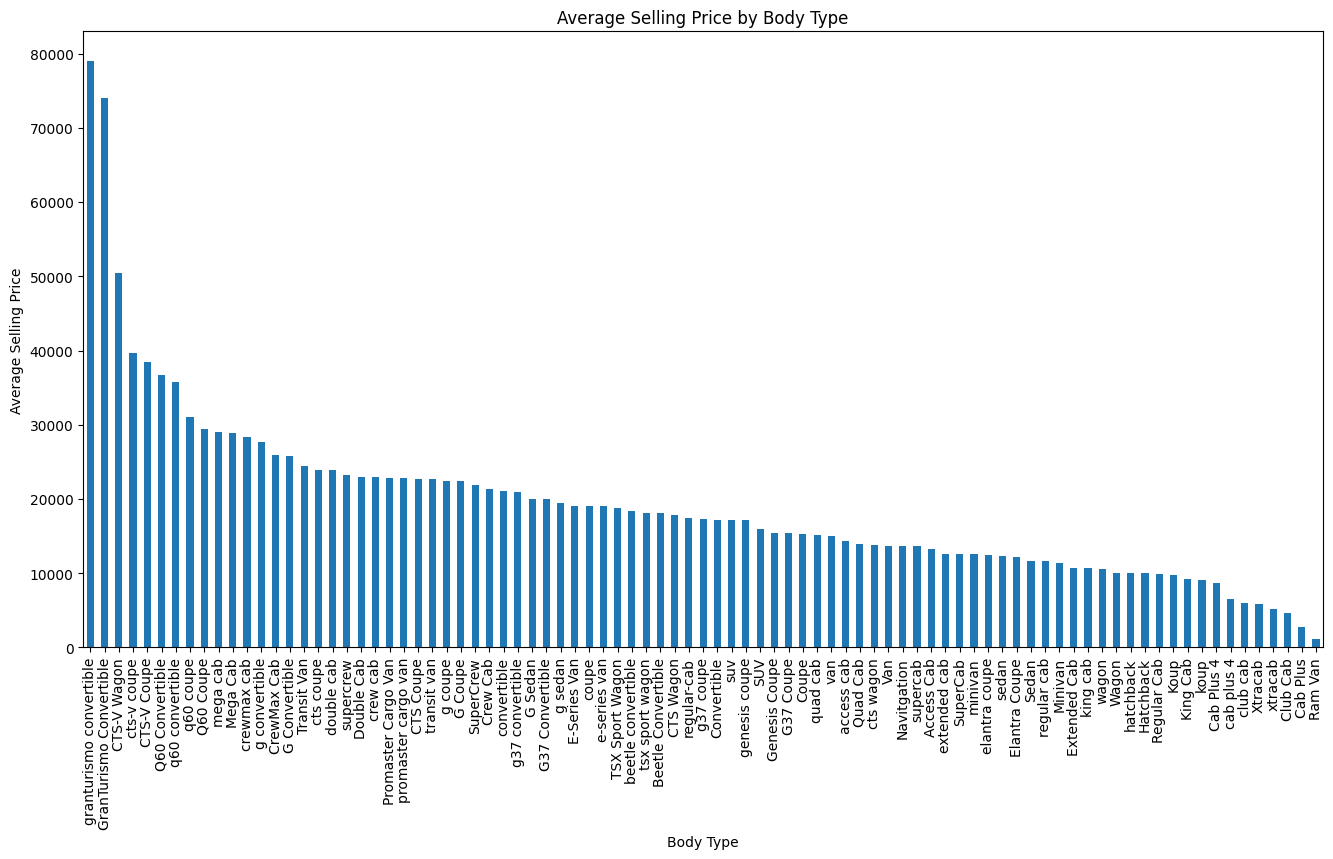

In [13]:
plt.figure(figsize=(16, 8))
body_type_prices.plot(kind='bar')
plt.title('Average Selling Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.show()

## 6. Do certain sellers consistently achieve higher selling prices than others?

In [14]:
seller_prices = df.groupby('seller')['sellingprice'].mean().sort_values(ascending=False)
print(seller_prices)

seller
phelps auto sales                           161000.000000
financial services remarketing (bmw int)    153222.222222
autolink sales llc                          134500.000000
chings trading                              134000.000000
carbiz solutions  inc.                      133000.000000
                                                ...      
alberta truck & auto liquidators               200.000000
sindibad auto sale llc                         200.000000
american red cross/lehigh valley               200.000000
titlemax/manning sc1                           150.000000
kfl llc                                               NaN
Name: sellingprice, Length: 14263, dtype: float64


## 7. What are the most common colors of vehicles sold?

In [15]:
color_prices = df.groupby('color')['sellingprice'].mean().sort_values(ascending=False)
print(color_prices)

color
—            17819.737249
charcoal     16247.496868
black        15509.004749
brown        15352.808099
off-white    15230.229814
white        14740.698566
339          14300.000000
2711         14250.000000
721          14100.000000
2172         14050.000000
6864         14000.000000
gray         13951.472880
9887         13900.000000
11034        13900.000000
6388         13850.000000
12655        13850.000000
2817         13750.000000
14872        13700.000000
6158         13650.000000
15719        13650.000000
2846         13600.000000
16633        13600.000000
20627        13600.000000
20379        13600.000000
18384        13550.000000
9837         13500.000000
5001         13400.000000
5705         13400.000000
9410         13300.000000
lime         13256.666667
9562         13200.000000
4802         13200.000000
18561        13200.000000
1167         13200.000000
orange       12787.109240
red          12688.912002
yellow       12652.202335
purple       11969.684817
burgun

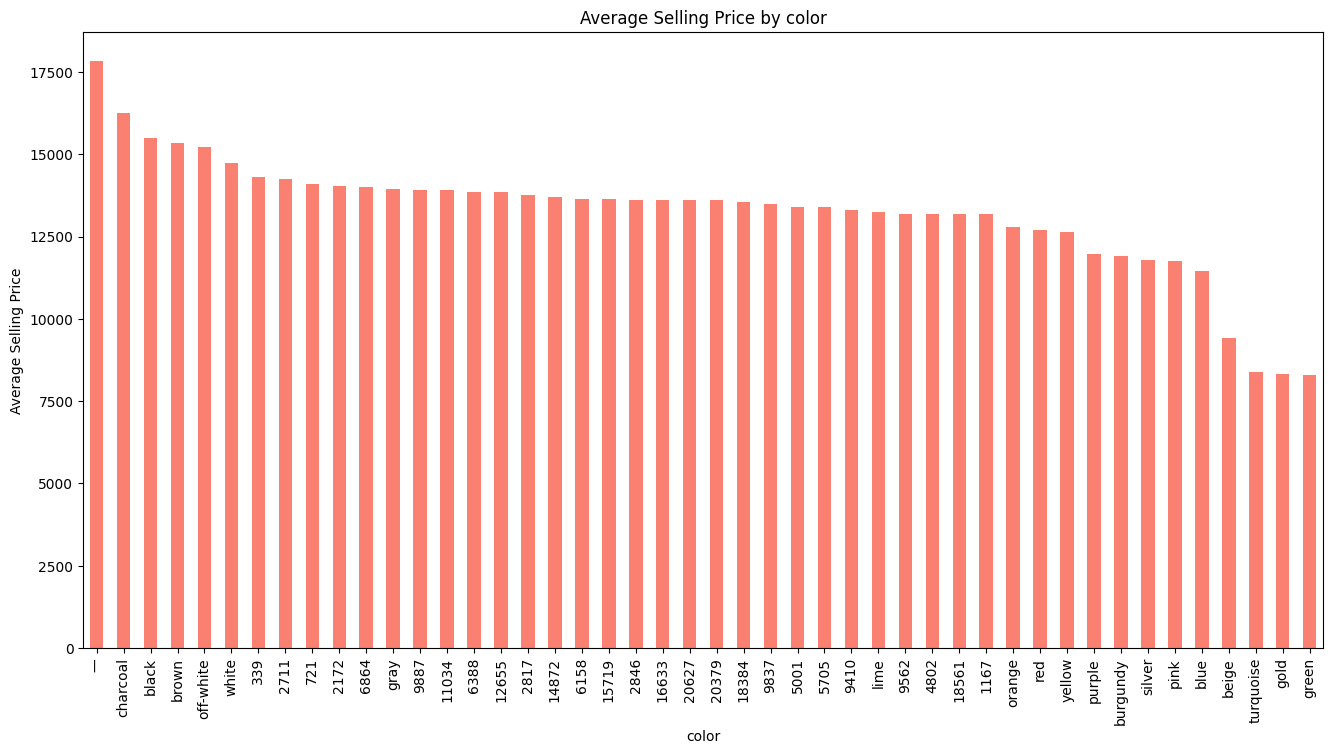

In [16]:
plt.figure(figsize=(16, 8))
color_prices.plot(kind='bar', color='salmon')
plt.title('Average Selling Price by color')
plt.xlabel('color')
plt.ylabel('Average Selling Price')
plt.show()

## 8. Which car makes are the top sellers in terms of total sales volume?

In [17]:
top_manufacturer = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
print(top_manufacturer.head(10))

make
Rolls-Royce     153488.235294
Ferrari         127210.526316
Lamborghini     112625.000000
Bentley          74367.672414
airstream        71000.000000
Tesla            67054.347826
Aston Martin     54812.000000
Fisker           46461.111111
Maserati         45320.300752
Lotus            40800.000000
Name: sellingprice, dtype: float64
